### Problem Statement

To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Step 1: Reading and understanding Data

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [168]:
df = pd.read_csv(r'C:\Users\Ashis\day.csv')

In [169]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can see no columns has any null entries. Hence, no need to impute data in data cleaning step.

In [171]:
df.shape

(730, 16)

In [172]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Data Cleaning

In [173]:
#deleting not required columns

In [174]:
df.drop(['instant','dteday','casual','registered'],axis=1,inplace = True)

### Step 3: Visualizing the Data

In [175]:
num_vars = ['windspeed','hum','atemp','temp','cnt']
cat_vars = ['weathersit','workingday','weekday','season','yr','mnth','holiday']

#### Visualizing Numerical Variables

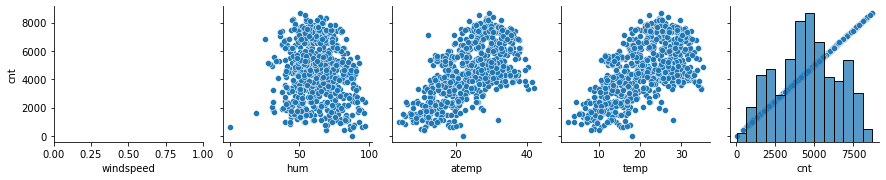

In [176]:
sns.pairplot(data=df,y_vars = 'cnt',x_vars = num_vars )
plt.show()

1. Weak linear relationship for demand vs hum
2. Strong linear relationship for demand vs atemp/temp

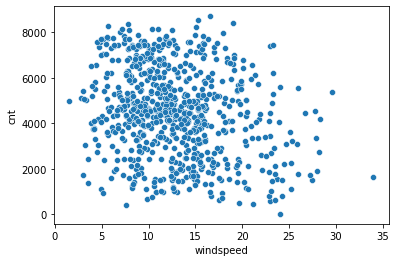

In [177]:
sns.scatterplot(data = df,x='windspeed',y = 'cnt')
plt.show()

There seems a medium relationship between cnt and windspeed

<AxesSubplot:>

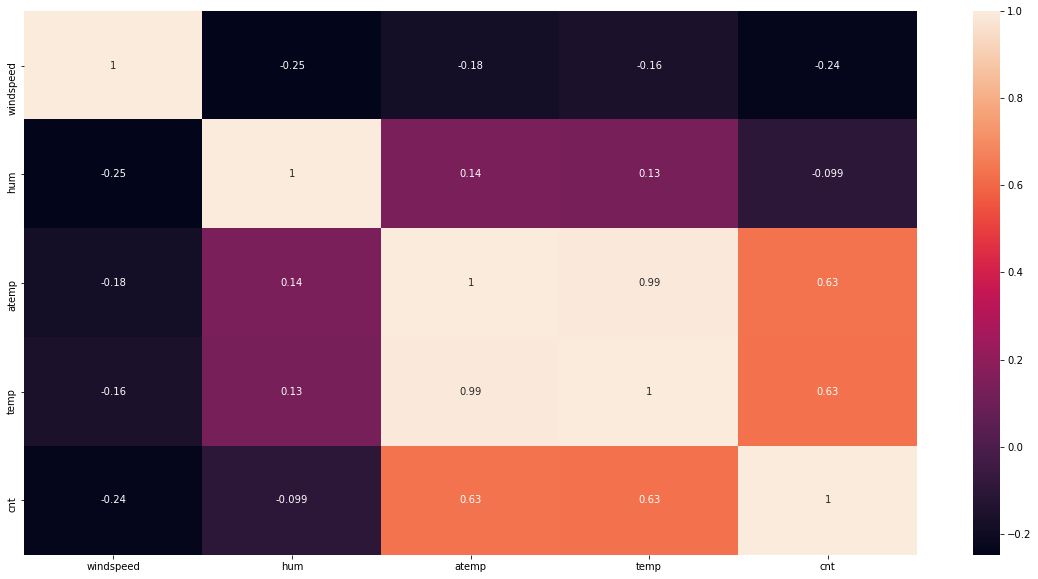

In [178]:
fig = plt.figure(figsize = (20,10))
#removing categorical variables which have more than 2 categories and instant column
sns.heatmap(df.loc[:,num_vars].corr(),annot = True)

1. Cnt has high correlation with temp and atemp.
2. Temp and atemp have very high correlation with each other. So, one can be dropped.
3. Cnt has low negative correlation with windspeed 

In [179]:
df.drop(['temp'],axis=1,inplace = True)

#### Visualizing Categorical Variables

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

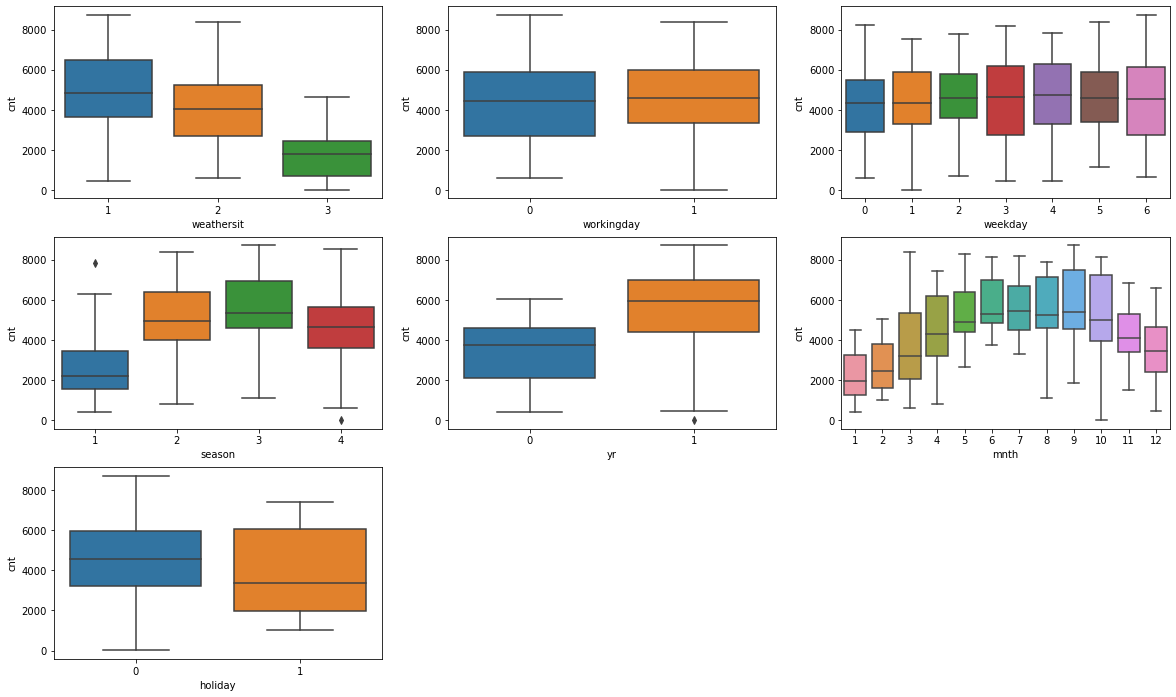

In [180]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = cat_vars[0], y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = cat_vars[1], y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = cat_vars[2], y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = cat_vars[3], y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = cat_vars[4], y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = cat_vars[5], y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = cat_vars[6], y = 'cnt', data = df)

1. 2019 has more demand
2. Months (Excet Nov-Feb) show good demand
3. Higher demand observed for non holiday days, suggesting people use to for their commute and in holidays possibly they stay at home
4. No strong variation observed for variables - working day and weekday

In [181]:
#dropping weekday and workingday variables as their mean cnt by levels don't change much
df.drop(['workingday','weekday'],axis=1,inplace = True)

### Step 4: Data Preparation

- Columns such as season,weathersit,weekday and mnth need to be converted to dummy variables

#### Dummy Variables

In [182]:
weathersit_df = pd.get_dummies(df.weathersit,prefix = 'weathersit',drop_first = True)

In [183]:
season_df = pd.get_dummies(df.season,prefix = 'season',drop_first = True)

In [184]:
#weekday_df = pd.get_dummies(df.weekday,prefix = 'weekday',drop_first = True)

In [185]:
month_df = pd.get_dummies(df.mnth,prefix = 'month',drop_first = True)

In [186]:
#concat dummy variables

df = pd.concat([df,weathersit_df,season_df,month_df],axis=1)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        730 non-null    int64  
 1   yr            730 non-null    int64  
 2   mnth          730 non-null    int64  
 3   holiday       730 non-null    int64  
 4   weathersit    730 non-null    int64  
 5   atemp         730 non-null    float64
 6   hum           730 non-null    float64
 7   windspeed     730 non-null    float64
 8   cnt           730 non-null    int64  
 9   weathersit_2  730 non-null    uint8  
 10  weathersit_3  730 non-null    uint8  
 11  season_2      730 non-null    uint8  
 12  season_3      730 non-null    uint8  
 13  season_4      730 non-null    uint8  
 14  month_2       730 non-null    uint8  
 15  month_3       730 non-null    uint8  
 16  month_4       730 non-null    uint8  
 17  month_5       730 non-null    uint8  
 18  month_6       730 non-null    

In [188]:
#deleting columns as we have already converted them to dummy variables
df.drop(['weathersit','season','mnth'],axis = 1, inplace = True)

<AxesSubplot:>

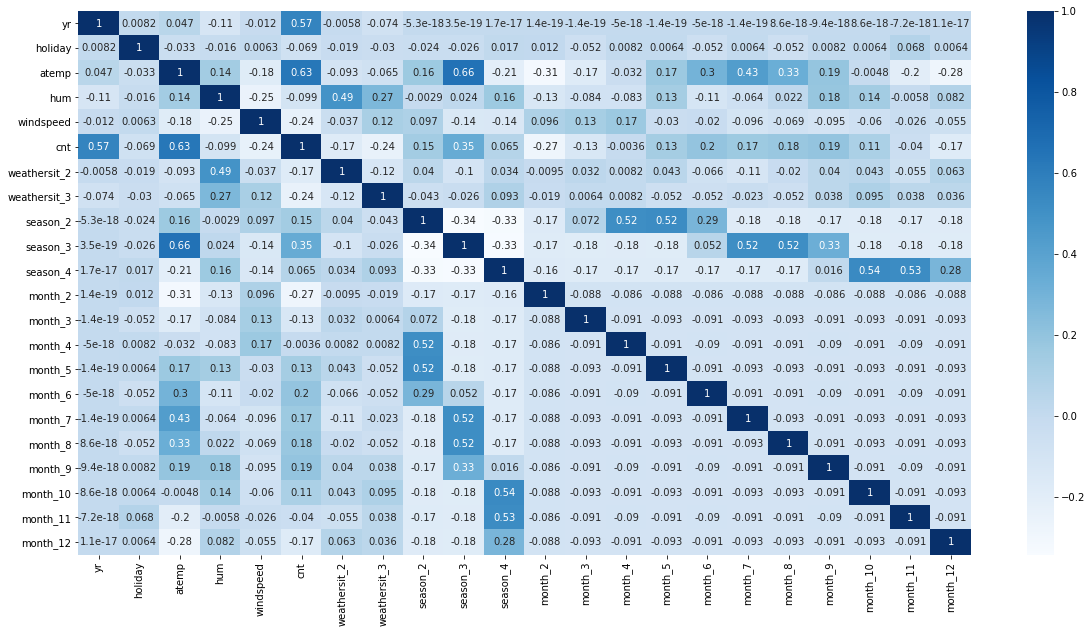

In [189]:
fig = plt.figure(figsize = (20,10))
#removing categorical variables which have more than 2 categories and instant column
sns.heatmap(df.corr(),annot = True,cmap="Blues")

In [190]:
#season 3 and atemp have high correlation. Hence, dropping season 3.
df.drop(['season_3'],axis = 1, inplace = True)

### Step 5: Splitting the data into Training and Testing Sets

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   atemp         730 non-null    float64
 3   hum           730 non-null    float64
 4   windspeed     730 non-null    float64
 5   cnt           730 non-null    int64  
 6   weathersit_2  730 non-null    uint8  
 7   weathersit_3  730 non-null    uint8  
 8   season_2      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  month_2       730 non-null    uint8  
 11  month_3       730 non-null    uint8  
 12  month_4       730 non-null    uint8  
 13  month_5       730 non-null    uint8  
 14  month_6       730 non-null    uint8  
 15  month_7       730 non-null    uint8  
 16  month_8       730 non-null    uint8  
 17  month_9       730 non-null    uint8  
 18  month_10      730 non-null    

In [192]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train,df_test = train_test_split(df,train_size = 0.7,random_state=100)

In [193]:
df_train.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'cnt', 'weathersit_2',
       'weathersit_3', 'season_2', 'season_4', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

#### Rescaling the features - MinMax Scaling

In [194]:
from sklearn.preprocessing import MinMaxScaler

In [195]:
scaler = MinMaxScaler()

In [196]:
df_train

,yr,holiday,atemp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
576,1,0,33.14480,70.4167,11.083475,7216,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,20.67460,62.1250,10.792293,4066,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,11.58500,48.3333,23.500518,1796,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,18.87520,48.9583,8.708325,4220,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,16.09770,72.9583,14.707907,1683,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,35.35440,65.9583,8.666718,7261,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,12.28585,42.3043,6.305571,1917,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,12.46855,56.0833,16.292189,2739,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
79,0,0,20.48675,73.7391,19.348461,2077,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [197]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = [ 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [198]:
df_train.describe()

,yr,holiday,atemp,hum,windspeed,cnt,weathersit_2,weathersit_3,season_2,season_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.513156,0.650480,0.320883,0.513499,0.345098,0.029412,0.247059,0.247059,...,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314
std,0.500429,0.157763,0.212410,0.145846,0.169803,0.224421,0.475867,0.169124,0.431725,0.431725,...,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


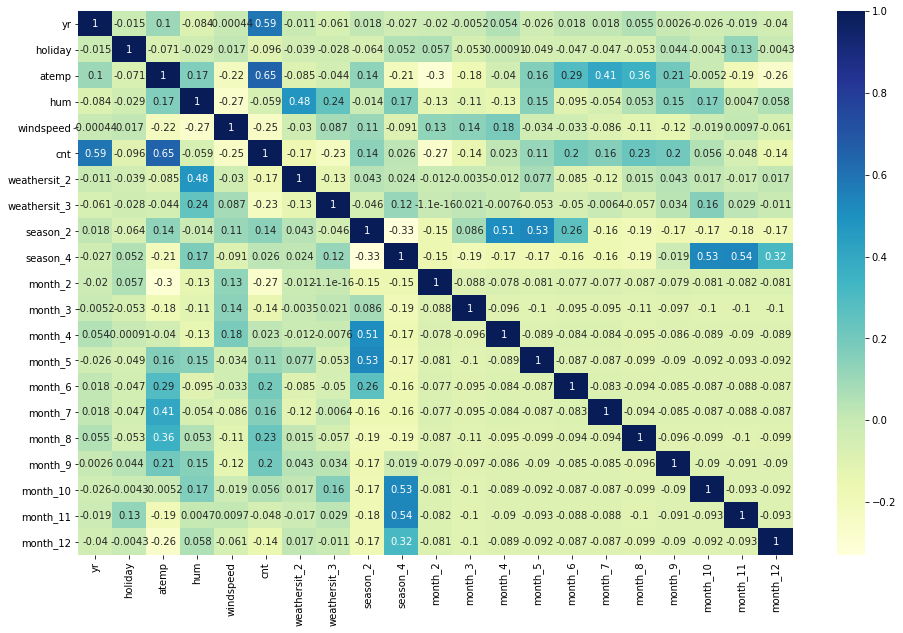

In [199]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- For cnt target variable, we observe variables with high correlation are atemp and yr

#### Dividing into X and Y sets for the model building

In [200]:
X_train = df_train.loc[:,~df_train.columns.isin(['cnt'])]
y_train  = df_train['cnt']

### Step 6: Model Building

#### Adding all the variables to the model

In [201]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

In [202]:
X_train_lm

,const,yr,holiday,atemp,hum,windspeed,weathersit_2,weathersit_3,season_2,season_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1.0,1,0,0.391735,0.504508,0.188475,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
111,1.0,0,0,0.318819,0.751824,0.380981,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.824359,0.679690,0.187140,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,1.0,0,0,0.218747,0.435939,0.111379,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.223544,0.577930,0.431816,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
79,1.0,0,0,0.434043,0.759870,0.529881,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [203]:
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [204]:
lr_1.params

const           0.224737
yr              0.232920
holiday        -0.081977
atemp           0.430800
hum            -0.164859
windspeed      -0.173177
weathersit_2   -0.055705
weathersit_3   -0.239697
season_2        0.065266
season_4        0.129606
month_2         0.029449
month_3         0.079699
month_4         0.089614
month_5         0.125986
month_6         0.122218
month_7         0.100465
month_8         0.162607
month_9         0.211048
month_10        0.097107
month_11        0.047386
month_12        0.036900
dtype: float64

In [205]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     131.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          6.76e-182
Time:                        07:56:05   Log-Likelihood:                 510.83
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     489   BIC:                            -890.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2247      0.029      7.740   

We see more than 10 variables with p values greater than 0.05. But before dropping them, lets look at VIF

#### Checking VIF

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [207]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.drop('const',axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.drop('const',axis=1).values, i) for i in range(X_train_lm.drop('const',axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,39.28
3,hum,18.97
8,season_4,7.99
7,season_2,6.24
12,month_5,6.15
17,month_10,5.66
13,month_6,5.52
15,month_8,5.51
14,month_7,5.38
18,month_11,5.08


### Dropping columns and then re-building the model

Approach:
If P value is greater than 0.05 and VIF is greater than 5, then drop
Else If P value is greater than 0.05 then drop
Else If VIF is greater than 5 then drop

Features are dropped one at a time, and then model is rebuilt.

The 1st column to be dropped is month_11 which has highest p value and VIF>5

In [208]:
X_train_lm = X_train_lm.drop("month_11",axis=1)

In [209]:
X_train_lm

,const,yr,holiday,atemp,hum,windspeed,weathersit_2,weathersit_3,season_2,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_12
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,0,0,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1.0,1,0,0.391735,0.504508,0.188475,1,0,1,0,0,0,1,0,0,0,0,0,0,0
111,1.0,0,0,0.318819,0.751824,0.380981,1,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.824359,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0,1,0,0,0
53,1.0,0,0,0.218747,0.435939,0.111379,0,0,0,0,1,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.223544,0.577930,0.431816,1,0,0,1,0,0,0,0,0,0,0,0,0,1
79,1.0,0,0,0.434043,0.759870,0.529881,1,0,1,0,0,1,0,0,0,0,0,0,0,0


In [210]:
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     137.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.80e-182
Time:                        07:56:06   Log-Likelihood:                 509.62
No. Observations:                 510   AIC:                            -979.2
Df Residuals:                     490   BIC:                            -894.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2302      0.029      7.981   

In [211]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.drop('const',axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.drop('const',axis=1).values, i) for i in range(X_train_lm.drop('const',axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,36.32
3,hum,18.79
7,season_2,6.24
12,month_5,5.55
13,month_6,4.87
15,month_8,4.70
14,month_7,4.63
11,month_4,4.43
4,windspeed,4.10
8,season_4,3.52


#### Removing month_12

In [212]:
X_train_lm = X_train_lm.drop("month_12",axis=1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.drop('const',axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.drop('const',axis=1).values, i) for i in range(X_train_lm.drop('const',axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     145.4
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.63e-183
Time:                        07:56:06   Log-Likelihood:                 509.51
No. Observations:                 510   AIC:                            -981.0
Df Residuals:                     491   BIC:                            -900.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2316      0.029      8.079   

#### Removing Month_2

In [213]:
X_train_lm = X_train_lm.drop("month_2",axis=1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.drop('const',axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.drop('const',axis=1).values, i) for i in range(X_train_lm.drop('const',axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     154.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.88e-184
Time:                        07:56:06   Log-Likelihood:                 509.12
No. Observations:                 510   AIC:                            -982.2
Df Residuals:                     492   BIC:                            -906.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2374      0.028      8.522   

#### Dropping month_4 column

In [214]:
X_train_lm = X_train_lm.drop("month_4",axis=1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.params)
print(lr_1.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.drop('const',axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.drop('const',axis=1).values, i) for i in range(X_train_lm.drop('const',axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

const           0.240494
yr              0.231611
holiday        -0.083013
atemp           0.492864
hum            -0.181417
windspeed      -0.164666
weathersit_2   -0.054732
weathersit_3   -0.233719
season_2        0.099420
season_4        0.142007
month_3         0.033627
month_5         0.046726
month_6         0.047179
month_7         0.042658
month_8         0.109812
month_9         0.161453
month_10        0.046357
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     162.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.83e-184
Time:                        07:56:06   Log-Likelihood:                 506.48
No. Observations:                 510   AIC:                            -979.0
Df Resi

#### Dropping month_7 column

In [215]:
X_train_lm = X_train_lm.drop("month_7",axis=1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.drop('const',axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.drop('const',axis=1).values, i) for i in range(X_train_lm.drop('const',axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     172.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.74e-185
Time:                        07:56:06   Log-Likelihood:                 505.19
No. Observations:                 510   AIC:                            -978.4
Df Residuals:                     494   BIC:                            -910.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2370      0.028      8.495   

In [216]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     172.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.74e-185
Time:                        07:56:06   Log-Likelihood:                 505.19
No. Observations:                 510   AIC:                            -978.4
Df Residuals:                     494   BIC:                            -910.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2370      0.028      8.495   

In [217]:
X_train_lm = X_train_lm.drop("month_6",axis=1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.params)
print(lr_1.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.drop('const',axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.drop('const',axis=1).values, i) for i in range(X_train_lm.drop('const',axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

const           0.236716
yr              0.229920
holiday        -0.087921
atemp           0.555765
hum            -0.192912
windspeed      -0.170038
weathersit_2   -0.053288
weathersit_3   -0.230230
season_2        0.095774
season_4        0.133419
month_3         0.022918
month_5         0.024776
month_8         0.076216
month_9         0.135569
month_10        0.036698
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          9.51e-186
Time:                        07:56:06   Log-Likelihood:                 504.14
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     495   BIC:             

#### Dropping month_5 column

In [218]:
X_train_lm = X_train_lm.drop("month_5",axis=1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.params)
print(lr_1.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.drop('const',axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.drop('const',axis=1).values, i) for i in range(X_train_lm.drop('const',axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

const           0.232180
yr              0.229510
holiday        -0.088657
atemp           0.557874
hum            -0.184778
windspeed      -0.171123
weathersit_2   -0.053658
weathersit_3   -0.232756
season_2        0.103548
season_4        0.132587
month_3         0.019783
month_8         0.074357
month_9         0.133786
month_10        0.036024
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.72e-186
Time:                        07:56:06   Log-Likelihood:                 503.15
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df 

#### Dropping month_3 column

In [219]:
X_train_lm = X_train_lm.drop("month_3",axis=1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.params)
print(lr_1.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.drop('const',axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.drop('const',axis=1).values, i) for i in range(X_train_lm.drop('const',axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

const           0.237601
yr              0.229638
holiday        -0.090720
atemp           0.553200
hum            -0.185868
windspeed      -0.169141
weathersit_2   -0.053539
weathersit_3   -0.231429
season_2        0.103475
season_4        0.129284
month_8         0.072523
month_9         0.132395
month_10        0.036259
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.4
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.94e-187
Time:                        07:56:06   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -978.4
Df Residuals:                     497   BIC:                            -923.3
Df Model:                   

#### Dropping hum column

In [220]:
X_train_lm = X_train_lm.drop("hum",axis=1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.params)
print(lr_1.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.drop('const',axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.drop('const',axis=1).values, i) for i in range(X_train_lm.drop('const',axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

const           0.131570
yr              0.233773
holiday        -0.092425
atemp           0.528952
windspeed      -0.134212
weathersit_2   -0.083063
weathersit_3   -0.281279
season_2        0.100479
season_4        0.120556
month_8         0.070589
month_9         0.125376
month_10        0.031604
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.14e-183
Time:                        07:56:06   Log-Likelihood:                 490.21
No. Observations:                 510   AIC:                            -956.4
Df Residuals:                     498   BIC:                            -905.6
Df Model:                          11                

#### Dropping month_10 column

In [221]:
X_train_lm = X_train_lm.drop("month_10",axis=1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
print(lr_1.params)
print(lr_1.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_lm.drop('const',axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.drop('const',axis=1).values, i) for i in range(X_train_lm.drop('const',axis=1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

const           0.127500
yr              0.233436
holiday        -0.093374
atemp           0.536994
windspeed      -0.131917
weathersit_2   -0.082231
weathersit_3   -0.276020
season_2        0.098988
season_4        0.131127
month_8         0.067940
month_9         0.120851
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          6.05e-184
Time:                        07:56:06   Log-Likelihood:                 488.67
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     499   BIC:                            -908.8
Df Model:                          10                                         

#### Building model using RFE

In [222]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [223]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 11)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [224]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('season_2', True, 1),
 ('season_4', True, 1),
 ('month_2', False, 10),
 ('month_3', False, 3),
 ('month_4', False, 5),
 ('month_5', False, 2),
 ('month_6', False, 4),
 ('month_7', False, 6),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', False, 7),
 ('month_11', False, 8),
 ('month_12', False, 9)]

In [225]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'weathersit_2',
       'weathersit_3', 'season_2', 'season_4', 'month_8', 'month_9'],
      dtype='object')

In [226]:
X_train.columns[~rfe.support_]

Index(['month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

#### Building model using statsmodel, for detailed statistics

In [227]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [228]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [229]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [230]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.49e-187
Time:                        07:56:07   Log-Likelihood:                 500.06
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     498   BIC:                            -925.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2306      0.027      8.423   

In [231]:
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.69
2,atemp,9.73
4,windspeed,3.58
5,weathersit_2,2.13
0,yr,2.01
7,season_2,1.84
8,season_4,1.74
9,month_8,1.55
10,month_9,1.30
6,weathersit_3,1.16


In [232]:
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          6.05e-184
Time:                        07:56:07   Log-Likelihood:                 488.67
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     499   BIC:                            -908.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1275      0.017      7.429   

,Features,VIF
2,atemp,4.92
3,windspeed,3.05
0,yr,2.00
6,season_2,1.83
8,month_8,1.55
7,season_4,1.50
4,weathersit_2,1.49
9,month_9,1.30
5,weathersit_3,1.08
1,holiday,1.04


In [233]:
print(lr_1.summary())
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          6.05e-184
Time:                        07:56:07   Log-Likelihood:                 488.67
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     499   BIC:                            -908.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1275      0.017      7.429   

### Step 7: Residual analysis of training set

In [234]:
y_pred_train = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

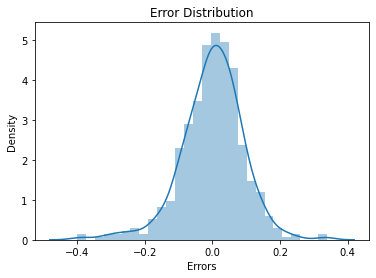

In [235]:
fig = plt.figure()
sns.distplot(y_train - y_pred_train)
plt.title('Error Distribution')
plt.xlabel('Errors')

We see a normal distribution of the residuals centered around zero. This validates one of the assumptions of the linear analysis.

<function matplotlib.pyplot.show(close=None, block=None)>

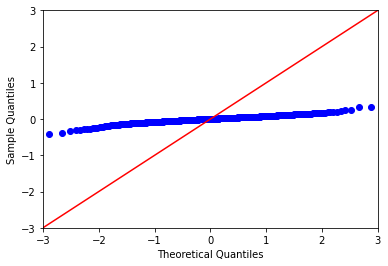

In [236]:
#Q-Q Plot

sm.qqplot(y_train - y_pred_train,line = '45')
plt.show

The above Q-Q plot shows that the residuals are stacked up at zero and have very narrow tails

Text(0.5, 0, 'Errors')

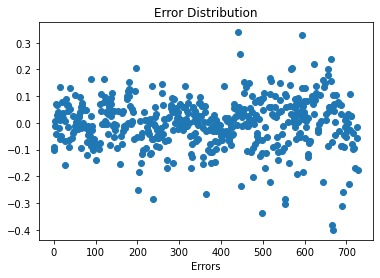

In [237]:
fig = plt.figure()
plt.scatter(x = y_train.index, y= y_train - y_pred_train)
plt.title('Error Distribution')
plt.xlabel('Errors')

### Step 8: Making Predictions

In [238]:
num_vars = [ 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [239]:
df_test.drop(['hum','month_2','month_3','month_4','month_5','month_6','month_7','month_10','month_11','month_12'],axis=1,inplace = True)

In [240]:
X_test = sm.add_constant(df_test.drop(['cnt'],axis=1))
y_test = df_test['cnt']

In [241]:
y_pred_test = lm.predict(X_test)

Text(0, 0.5, 'y_pred_test')

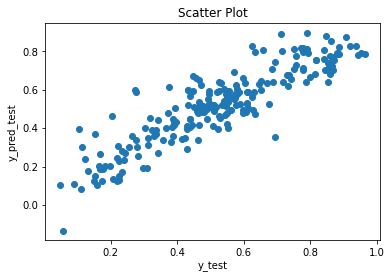

In [242]:
plt.scatter(y_test,y_pred_test)
plt.title("Scatter Plot")
plt.xlabel("y_test")
plt.ylabel("y_pred_test")

In [243]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.79425209298371

### Conclusion

An r2 score of 0.79 is a good score and hence we can conclude that our model is robust and fit for predicting it on any dataset (interpolation related)